<a href="https://colab.research.google.com/github/adriansanchezroy/SecWebsite/blob/main/10_Bases_de_donn%C3%A9es_NoSQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuration
-------------------

Les cellules de cette section doivent être exécutées avant le reste du document. Si vous êtes déconnecté de l'engin d'exécution par Google Colab, il vous faudra exécuter cette section de nouveau.

Le code de cette section a pour fin :

* Créer la commande %%mongo.

* Customiser la commande `%%javascript` pour permettre que le code fourni soit exécuté côté conteneur Colab.

* Installer MongoDB, quelques bases de données d'exemple, Mongo Shell et mettre à jour la version de Node.js du conteneur Colab.

In [ ]:
"""
Le code de cette cellule ira installer les extensions,
les logiciels necéssaires et mettre à jour la version de Node.js
utilisée par Colab.
"""
!mkdir -p /content/cuisine /content/toronto

!pip3 install classroom-extensions
%load_ext classroom_extensions.node_install
%load_ext classroom_extensions.mongodb_install

%install_nodejs
%install_mongodb --sample_dbs

%load_ext classroom_extensions.web
%load_ext classroom_extensions.mongodb

# NoSQL
----------------

Le NoSQL (*Not Only SQL*) englobe un ensemble de concepts visant à traiter rapidement et efficacement des collections de données, en mettant l'accent sur la performance, la fiabilité et l'agilité.

Les systèmes NoSQL permettent de stocker et de récupérer des données dans divers formats, tels que les bases de données orientées clé-valeur, les bases de données de graphes, les bases de données en colonnes, les bases de données orientées documents, etc. **En général, les bases de données NoSQL évitent l'utilisation de jointures, ce qui facilite l'extraction des données via des interfaces simples et sans jointures.**

Les systèmes NoSQL autorisent la distribution d'une base de données sur plusieurs machines, ce qui contribue souvent à des performances optimales. Les bases de données NoSQL sont conçues pour évoluer et offrir une évolutivité linéaire. En ajoutant des ressources, les performances augmentent normalement de manière constante.

Il est important de noter que le NoSQL considère les solutions SQL comme des options viables. Le terme NoSQL est généralement synonyme de **"Pas seulement SQL."**

## Les limites des bases de données relationnelles

Les bases de données relationnelles ont longtemps été le choix prédominant pour la gestion des données, car elles résolvent de nombreuses limitations associées aux techniques précédemment utilisées, telles que les fichiers, les bases de données hiérarchiques et les bases de données réseau.

Cependant, **avec l'avènement d'Internet, les limites des bases de données relationnelles sont devenues de plus en plus préoccupantes**. Les développeurs d'applications Web, confrontés à d'énormes volumes de données et à un grand nombre d'utilisateurs, ont constaté la nécessité de répondre à des défis majeurs, notamment :

* Gérer des quantités massives d'opérations de lecture et d'écriture.

* Fournir des temps de réponse à faible latence.

* Assurer une disponibilité élevée.

**Les bases de données relationnelles se sont avérées inadéquates pour évoluer et répondre aux besoins opérationnels et aux exigences croissantes des entreprises.**

L'exploitation d'un seul système de gestion de base de données relationnelle sur plusieurs serveurs s'est révélée être une opération complexe, avec des coûts de mise en œuvre des transactions augmentant proportionnellement à la taille du cluster de la base de données.


## Variété des bases de données NoSQL

De nombreuses bases de données NoSQL tirent parti des systèmes distribués, mais elles peuvent adopter diverses stratégies de gestion des données. Voici une liste des principaux types de bases de données NoSQL clés :

* **Les bases de données clé-valeur** fonctionnent selon un modèle simple basé sur des clés, qui servent d'identifiants pour récupérer des données, et des valeurs, qui représentent les données associées aux clés (ex. DynamoDB, Redis).

* **Les bases de données de documents** utilisent également des identificateurs pour récupérer des valeurs, mais les valeurs consistent en des collections d'éléments de données stockés ensemble dans une structure flexible (ex. **MongoDB**, CouchDB).

* **Les bases de données de groupes de colonnes** partagent certaines caractéristiques des bases de données relationnelles, notamment l'organisation des données en ensembles de colonnes (ex. Amazon SimpleDB, Cassandra, HBase).

* **Les bases de données de graphes** sont particulièrement adaptées pour modéliser des objets et leurs relations (ex. Neo4j, IBM Graph).

## Gestion des données avec des bases de données distribuées

Les bases de données remplissent une double fonction fondamentale :

* D'une part, elles ont pour mission de **stocker des données**, c'est-à-dire d'enregistrer des informations de manière fiable et durable pour qu'elles puissent être récupérées ultérieurement.

* D'autre part, elles doivent également être capables de **récupérer des données**, permettant aux utilisateurs d'accéder rapidement et efficacement aux informations dont ils ont besoin.

Pour accomplir ces objectifs, les systèmes de gestion de bases de données doivent mettre en place un ensemble de fonctions essentielles :

* Tout d'abord, ils doivent **stocker les données de manière persistante**. Cela signifie que les données doivent être enregistrées de telle sorte qu'elles ne soient pas perdues, même en cas d'arrêt du serveur de base de données.

* En outre, il est crucial de **maintenir la cohérence des données**. Cette cohérence implique de garantir que les informations correctes sont écrites sur un support de stockage permanent. Bien que les problèmes de cohérence se posent rarement, ils peuvent survenir en cas de panne matérielle. Cependant, un défi plus fréquent se présente lorsque plusieurs utilisateurs souhaitent lire et écrire les mêmes données simultanément, ce qui nécessite des mécanismes spécifiques pour gérer ces situations complexes.

* Enfin, un troisième aspect crucial consiste à **garantir la disponibilité des données**. Les informations doivent être accessibles dès qu'elles sont requises, afin de répondre aux besoins des utilisateurs de manière rapide et efficace.

Ainsi, les systèmes de gestion de bases de données se trouvent au cœur de l'infrastructure informatique, où ils accomplissent ces tâches essentielles pour stocker, maintenir et mettre à disposition des données de manière fiable et efficace.


## Cohérence, disponibilité et partitionnement : le théorème CAP

Le [théorème CAP](https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_CAP) (*Consistency, Availability, and Partitioning*), également connu sous le nom de théorème de Brewer en l'honneur de l'informaticien qui l'a formulé, **énonce une règle fondamentale pour les bases de données distribuées : elles ne peuvent simultanément garantir la cohérence (C), la disponibilité (A) et la résistance aux partitions (P).**

* **La cohérence (C)** implique que les copies de données sur différents serveurs demeurent cohérentes, reflétant la dernière mise à jour de l'information.

* **La disponibilité (A)** signifie que le système doit toujours répondre aux requêtes des utilisateurs, même en cas de défaillance d'un nœud du réseau.

* **La protection contre les partitions (P)** se réfère à la capacité du système à continuer de fonctionner, avec des données cohérentes, en présence de défaillances de communication entre les serveurs.

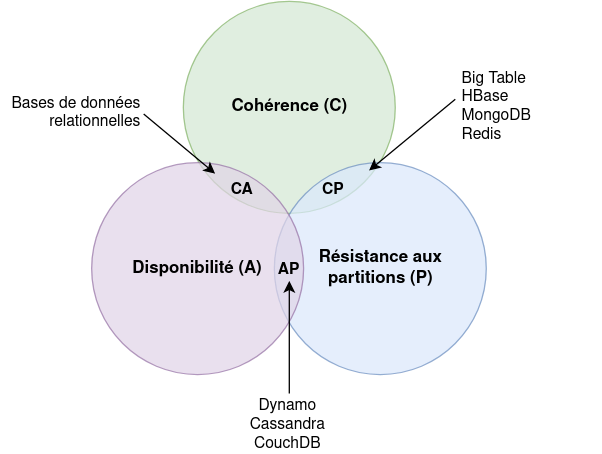

Ce théorème met en évidence les compromis inévitables auxquels sont confrontées les bases de données distribuées. Les bases de données NoSQL, par exemple, adoptent fréquemment une approche connue sous le nom de [BASE](https://en.wikipedia.org/wiki/Eventual_consistency) (*Basically Available, Soft State, Eventually Consistent*).

* Le **BA**, d'**essentiellement disponible**, signifie qu'il peut y avoir une défaillance partielle dans certaines parties du système distribué, mais le reste du système continue de fonctionner.

* Le **S** représente le fait que les données peuvent éventuellement être écrasées par des données plus récentes, ce qui est lié à la troisième propriété des transactions BASE, à savoir la **cohérence éventuelle**.

* Le **E** évoque la **cohérence éventuelle**, ce qui indique qu'il peut y avoir des moments où la base de données n'est pas en état de cohérence, mais cette incohérence est tolérée en échange d'une meilleure disponibilité et d'une réactivité du système.

Ainsi, le théorème CAP et le concept BASE fournissent un cadre essentiel pour comprendre les compromis inhérents à la conception de bases de données distribuées et l'importance d'adapter les caractéristiques de cohérence et d'accessibilité en fonction des besoins spécifiques de chaque application.


# MongoDB
-------------

**MongoDB** est un système de gestion de bases de données orienté documents connu pour sa flexibilité et sa capacité à gérer des données de manière évolutive. Il se base sur un modèle de données unique où les documents jouent le rôle équivalent des entrées des tables dans les bases de données relationnelles.

L'architecture de MongoDB est conçue pour offrir une grande adaptabilité et évolutivité. Les données sont organisées en **collections**, qui diffèrent des tables dans les bases de données relationnelles en ce qu'elles possèdent un schéma dynamique. Cette flexibilité permet aux développeurs d'ajouter ou de supprimer des champs dans les documents selon les besoins, sans imposer de contraintes rigides.

Une particularité de MongoDB réside dans sa capacité à héberger plusieurs **bases de données indépendantes** au sein d'une seule instance. Chaque base de données peut contenir ses propres collections, offrant une isolation et une organisation des données au niveau de l'application.

Chaque document dans une collection MongoDB est identifié par une clé spéciale, **_id**, qui doit être unique au sein de cette collection, similaire aux clés primaires des bases de données relationnelles.

MongoDB est accompagné d'un outil puissant, le **mongo shell**, qui permet l'administration des instances MongoDB et la manipulation des données via le langage de requête propre à MongoDB. Ce shell va au-delà de la gestion des bases de données, puisqu'il s'agit également d'un interpréteur JavaScript complet, offrant ainsi la possibilité aux utilisateurs de créer et d'exécuter des scripts pour automatiser des tâches, effectuer des analyses et bien plus encore.

## Documents

Le document, la base de MongoDB, est un ensemble ordonné de clés avec des valeurs associées. En JavaScript, les documents sont représentés sous forme d'objets, similaires à JSON (techniquement [BSON](https://bsonspec.org/)) :

```javascript
{"salutation" : "Bonjour, tout le monde !"}
```

Ce document simple contient une seule clé, `"salutation"`, avec une valeur de `"Bonjour, tout le monde !"`. La plupart des documents seront plus complexes que celui-ci et contiendront souvent plusieurs paires clé/valeur ou des documents imbriqués :

```javascript
{
    "genres" : [ "Comedy", "Horror" ],
    "runtime" : 84,
    "rated" : "R",
    "cast" : [
      "Eugene Levy",
      "Andrea Martin",
      "Ronald Ulrich",
      "Randall Carpenter"
    ],
    "title" : "Cannibal Girls",
    "languages" : [ "English" ],
    "directors": [ "Ivan Reitman" ],
    "writers" : [
      "Daniel Goldberg (story)",
      "Ivan Reitman (story)",
      "Robert Sandler"
    ],
    "year" : 1973,
    "imdb" : { rating: 4.5, votes: 571, id: 69841 },
    "countries" : [ "Canada" ],
    "type" : "movie"
}
```

Les clés d'un document sont des chaînes de caractères. Les clés ne doivent pas contenir le caractère `\0` (le caractère nul)

* Le `.` et `$` ont des propriétés spéciales et ne doivent être utilisés que dans certaines circonstances.

MongoDB est sensible au type et à la casse et les documents ne peuvent pas contenir de clés en double.

### JSON vs BSON

| | JSON | BSON|
|--|--|--|
|Encodage| Chaine UTF-8 | Binaire |
| Données supportées| String, Boolean, Number, Array | String, Boolean, Number (Integer, Float, Long, Decimal128...), Array, Date, Raw Binary |
| Lisibilité | Humain et machine  | Machine uniquement  |

Source: [JSON and BSON](https://www.mongodb.com/json-and-bson)

## Collections

Une collection est un ensemble de documents et peut être considérée comme l'analogue d'une table d'une base de données relationelle.

### Schémas dynamiques

Les collections ont des schémas dynamiques, ce qui signifie que les documents d'une même collection peuvent avoir un certain nombre de formes différentes. Par exemple:

```javascript
{"salutation" : "Bonjour, tout le monde !", "visualisations" : 10}
{"adieu" : "Au revoir, mes chères collègues !"}
```

MongoDB permet de stocker tous les documents dans une même collection, mais il existe de très bonnes raisons de créer un schéma et de regrouper des types de documents apparentés.

* **Bien que cela ne soit pas obligatoire par défaut, la définition de schémas pour une application est une bonne pratique.**

Les noms de collection peuvent être n'importe quelle chaîne `UTF-8`, avec quelques restrictions :

* La chaîne vide (`""`) n'est pas un nom de collection valide.
* Les noms de collection ne peuvent pas contenir le caractère `\0` (le caractère nul).
* On ne doit pas créer une collection dont le nom commence par `system.` car il s'agit d'un préfixe réservé aux collections internes.

## Bases de données

MongoDB organise les collections au sein de bases de données. Une seule instance de MongoDB peut contenir plusieurs bases de données, chacune pouvant regrouper zéro ou plusieurs collections.

Une règle empirique conseille de stocker toutes les données d'une même application au sein d'une seule base de données. Les bases de données distinctes trouvent leur utilité lorsqu'il s'agit de stocker des données pour plusieurs applications ou utilisateurs sur un même serveur MongoDB.

## Pour exécuter les exemples

Pour les exemples présentés dans ce cours, vous pouvez installer la [version communautaire de MongoDB](https://www.mongodb.com/docs/manual/installation/) sur votre ordinateur.

Vou pouvez créer un cluster MongoDB gratuit sur le cloud d'Atlas:

* https://www.mongodb.com/cloud

Vou pouvez également installer la bibliothèque `colab-xterm` qui permet d'accéder la console du conteneur de Colab même si vous n'êtes pas abonné au service Pro (solution un peu hack à ruban adhésif):

In [ ]:
"""Pour installer et charger la bibliothèque"""
!pip install colab-xterm
%load_ext colabxterm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 2.8 MB/s eta 0:00:00


Pour créer un terminal:

In [ ]:
%xterm

## MongoDB Shell

MongoDB comporte un [shell JavaScript](https://www.mongodb.com/docs/mongodb-shell/install) qui permet l'interaction avec une instance MongoDB à partir de la ligne de commande. Le shell est utile pour effectuer des fonctions administratives, inspecter une instance en cours d'exécution ou simplement explorer MongoDB.

Quelques informations utiles:

* Le shell est un interpréteur JavaScript complet.

* Par défault, il tente automatiquement de se connecter à un serveur MongoDB exécuté sur la machine locale.

* Bien que la possibilité d'exécuter du JavaScript arbitraire soit utile, la véritable puissance du shell réside dans le fait qu'il s'agit également d'un client MongoDB autonome.

Pour démarrer Mongo Shell, on exécute l'exécutable `mongosh`. Dans ce cahier nous allons utiliser la commande magic `%%mongo`, conçue pour fournir le contenu de la cellule à `mongosh` et afficher le résultat d'exécution:

In [ ]:
%%mongo
db

test> test
test> 

Au démarrage, le shell se connecte à la base de données de `test` sur un serveur MongoDB et affecte cette connexion à la base de données à la variable globale `db`. Nous pouvons changer la base (et en créer une nouvelle) à l'aide du mot-clé `use`:

In [ ]:
%%mongo
use sample_mflix

test> switched to db sample_mflix
sample_mflix> 

Nous pouvons lister les bases de données disponibles:

In [ ]:
%%mongo
show dbs

test> admin                40.00 KiB
config               60.00 KiB
local                40.00 KiB
sample_airbnb        53.73 MiB
sample_analytics      9.47 MiB
sample_geospatial   784.00 KiB
sample_mflix         28.33 MiB
sample_supplies     968.00 KiB
sample_training      61.12 MiB
sample_weatherdata    2.52 MiB
test> 

Pour lister les collections de la base de données `sample_mflix`:

In [ ]:
%%mongo
use sample_mflix
show collections

test> switched to db sample_mflix
sample_mflix> comments
movies
sessions
theaters
users
sample_mflix> 

La variable `db` peut être utilisé pour accéder à des collections:

In [ ]:
%%mongo
use sample_mflix
db.movies.findOne({})

test> switched to db sample_mflix
sample_mflix> {
  _id: ObjectId('573a1390f29313caabcd4135'),
  plot: 'Three men hammer on an anvil and pass a bottle of beer around.',
  genres: [ 'Short' ],
  runtime: 1,
  cast: [ 'Charles Kayser', 'John Ott' ],
  num_mflix_comments: 1,
  title: 'Blacksmith Scene',
  fullplot: 'A stationary camera looks at a large anvil with a blacksmith behind it and one on either side. The smith in the middle draws a heated metal rod from the fire, places it on the anvil, and all three begin a rhythmic hammering. After several blows, the metal goes back in the fire. One smith pulls out a bottle of beer, and they each take a swig. Then, out comes the glowing metal and the hammering resumes.',
  countries: [ 'USA' ],
  released: ISODate('1893-05-09T00:00:00.000Z'),
  directors: [ 'William K.L. Dickson' ],
  rated: 'UNRATED',
  awards: { wins: 1, nominations: 0, text: '1 win.' },
  lastupdated: '2015-08-26 00:03:50.133000000',
  year: 1893,
  imdb: { rating: 6.2, vote

## Opérations de base

Toutes les opérations d'écriture dans MongoDB sont atomiques au niveau d'un seul document.

### Écrire dans une collection

Les fonctions `insertOne` et `insertMany` sont utilisées pour ajouter des documents à une collection.

**Exemples:**

```javascript
db.planets.insertOne(
  {
    "name": 'Jupiter',
    "orderFromSun": 5,
    "hasRings": true,
    "mainAtmosphere": [ 'H2', 'He', 'CH4' ],
    "surfaceTemperatureC": { min: null, max: null, mean: -145.15 }
  }
)
```

Si la planète a été enregistrée dans la base de données, un JSON contenant son identifiant sera renvoyé.

```javascript
{
  acknowledged: true,
  insertedId: ObjectId("624107dd97f816cef5440c09")
}
```

Pour ajouter plusieurs documents:

```javascript
db.planets.insertMany(
  [
    {
      "name": 'Jupiter',
      "orderFromSun": 5,
      "hasRings": true,
      "mainAtmosphere": [ 'H2', 'He', 'CH4' ],
      "surfaceTemperatureC": { min: null, max: null, mean: -145.15 }
    },
    {
      "name": 'Earth',
      "orderFromSun": 3,
      "hasRings": false,
      "mainAtmosphere": [ 'N', 'O2', 'Ar' ],
      "surfaceTemperatureC": { "min": -89.2, "max": 56.7, "mean": 14 }
    }
  ]
)
```

Résultat d'exécution:

```javascript
{
  acknowledged: true,
  insertedIds: {
    '0': ObjectId("624108b997f816cef5440c0a"),
    '1': ObjectId("624108b997f816cef5440c0b")
  }
}
```

### Lire d'une collection

Les méthodes `find` et `findOne` sont utilisées pour interroger une collection:

**Exemples:**

```javascript
db.planets.find({orderFromSun: {$lt: 4}})
```

Exemple de réponse:

```javascript
[
  {
    _id: ObjectId("621ff30d2a3e781873fcb65c"),
    name: 'Mercury',
    orderFromSun: 1,
    hasRings: false,
    mainAtmosphere: [],
    surfaceTemperatureC: { min: -173, max: 427, mean: 67 }
  },
  {
    _id: ObjectId("621ff30d2a3e781873fcb662"),
    name: 'Venus',
    orderFromSun: 2,
    hasRings: false,
    mainAtmosphere: [ 'CO2', 'N' ],
    surfaceTemperatureC: { min: null, max: null, mean: 464 }
  },
  {
    _id: ObjectId("624108b997f816cef5440c0b"),
    name: 'Earth',
    orderFromSun: 3,
    hasRings: false,
    mainAtmosphere: [ 'N', 'O2', 'Ar' ],
    surfaceTemperatureC: { min: -89.2, max: 56.7, mean: 14 }
  }
]
```

Pour specifier une condition/filtre:

```javascript
db.planets.findOne({orderFromSun: {$lt: 4}})
```

Exemple de réponse:

```javascript
{
  _id: ObjectId("621ff30d2a3e781873fcb65c"),
  name: 'Mercury',
  orderFromSun: 1,
  hasRings: false,
  mainAtmosphere: [],
  surfaceTemperatureC: { min: -173, max: 427, mean: 67 }
}
```

**Note:** Consultez la documentation de MongoDB pour une liste detaillée des [operateurs de compairaison](https://www.mongodb.com/docs/manual/reference/operator/query/)

### Mises à jour

Si nous souhaitons modifier un document, nous pouvons utiliser `updateOne` ou `updateMany`. La méthode `updateOne` prend (au moins) deux paramètres:

* le premier est le critère pour trouver quel document mettre à jour, et

* le second est un document décrivant les mises à jour à faire.

**Exemple:**

```javascript
db.planets.updateOne({name: "Mercury"}, {$set: {obs: "Planète très chaude"}})
```

Exemple de réponse:
```javascript
{
  acknowledged: true,
  insertedId: null,
  matchedCount: 1,
  modifiedCount: 1,
  upsertedCount: 0
}
```

**Note:** Pour aller plus loin, regardez le [guide sur les opérateurs de mise à jour](https://www.mongodb.com/docs/manual/reference/operator/update/) de MongoDB.

### Pour supprimer des documents

Les méthodes `deleteOne` et `deleteMany` suppriment définitivement des documents de la base de données. Les deux méthodes utilisent un document filtre spécifiant les critères de suppression.

**Exemple:**

```javascript
db.planets.deleteOne({_id: ObjectId("621ff30d2a3e781873fcb661")})
```

Exemple de réponse:

```javascript
{ acknowledged: true, deletedCount: 1 }
```

**Note:** Pour aller plus loin, regardez [le guide sur les opérations CRUD](https://www.mongodb.com/docs/manual/crud/) (*Create, Read, Update, Delete*) de MongoDB.

## Types de données

MongoDB prend en charge un large éventail de types de données en tant que valeurs dans les documents. Les documents dans MongoDB peuvent être considérés comme "de type JSON" en ce sens qu'ils sont conceptuellement similaires aux objets en JavaScript.

**MongoDB ajoute un nombre de types de données supplémentaires tout en conservant la nature essentielle de la paire clé/valeur de JSON.**

Les types les plus courants sont :

  - **Null:** Le type null peut être utilisé pour représenter à la fois une valeur `null` et un champ inexistant:
```javascript
{"x" : null}
```

  - **Booléen:** Il existe un type booléen, qui peut être utilisé pour les valeurs `true` et `false`:
```javascript
{"x" : true}
```

  - **Nombre:** Le shell utilise par défaut des nombres à virgule flottante 64 bits. Ainsi, ces nombres semblent tous deux "normaux" dans le shell:
```javascript
{"x" : 3.14}
{"x" : 3}
```
Pour les entiers, on utilise les classes `NumberInt` ou `NumberLong`, qui représentent respectivement des entiers signés de 4 ou 8 octets.
```javascript
{"x" : NumberInt("3")}
{"x" : NumberLong("3")}
```

  - **Chaîne de caractères:** Toute chaîne de caractères `UTF-8` peut être représentée à l'aide du type de chaîne :
```javascript
{"x" : "une chaine de caractères"}
```
  - **Date:** MongoDB stocke les dates sous forme d'entiers 64 bits représentant des millisecondes depuis l'époque Unix (1er janvier 1970). Le fuseau horaire n'est pas enregistré:
```javascript
{"x" : new Date()}
```
  - **Expression régulière:** Les requêtes peuvent utiliser des expressions régulières à l'aide de la syntaxe d'expression régulière de JavaScript:
```javascript
{"x" : /foobar/i}
```
  - **Listes ou ensembles:** Les ensembles ou listes de valeurs peuvent être représentés sous forme de tableaux :
```javascript
{"x" : ["a", "b", "c"]}
```
  - **Document intégré:** Les documents peuvent contenir des documents entiers incorporés en tant que valeurs dans un document parent:
```javascript
{"x" : {"foo" : "bar"}}
```
  - **ID d'objet:** Un ID d'objet est un ID de 12 octets pour les documents :
```javascript
{"x" : ObjectId()}
```

# MongoDB et Node.js
-------------

Avant de regarder une version MongoDB de notre application de cuisine, regardons comment utiliser le module `mongodb` pour se connecter à MongoDB et consulter quelques informations d'une collection.

## Le module `mongodb`

Pour se connecter à MongoDB à partir des applications Node.js, nous utiliserons le pilote natif dont [la documentation](https://www.mongodb.com/docs/drivers/node/current/) se trouve disponible en ligne. Pour installer le module qui contient le pilote:

In [ ]:
!npm install --save mongodb


added 12 packages in 2s
npm notice 
npm notice New major version of npm available! 9.8.1 -> 10.2.4
npm notice Changelog: https://github.com/npm/cli/releases/tag/v10.2.4
npm notice Run npm install -g npm@10.2.4 to update!
npm notice 


Un exemple de connexion à MongoDB pour récupérer des données de la collection `customers` de la base `sample_analytics` :

In [ ]:
%%javascript --target=node --filename=mongodb_connect.mjs

// const { MongoClient } = require('mongodb');
// ou importer comment un module ES:

import { MongoClient } from 'mongodb'

// l'URL de connexion
const url = 'mongodb://localhost:27017';
const client = new MongoClient(url);

// Le nom de la base de données (du dataset d'exemple importé tout à l'heure)
const dbName = 'sample_analytics';

async function main() {
  await client.connect();  // connect pour connecter au serveur MongoDB

  console.log('Connecté au serveur');
  const db = client.db(dbName);   // sélectionner la base de données
  const collection = db.collection('customers');   // Choisir la collection

  // Chercher un document et l'afficher sur la console
  // .project({accounts: 0, tier_and_details: 0}) pour ignorer
  // les champs accounts et tier_and_details
  return await collection.find({name: {$regex : "Lauren"}}).project({accounts: 0, tier_and_details: 0}).toArray();
}

main()
  .then(result => {
    console.log("Liste de résultats:")
    console.log(JSON.stringify(result, null, 2))
  })
  .catch(console.error)
  .finally(() => client.close());

# API REST cuisine (version MongoDB)
------------------

Dans ce cahier nous allons mettre en place une version de l'API REST qui intègre MongoDB, étendant ainsi l'implémentation du cours précédent. Grâce à cette API, les applications clientes auront la capacité de récupérer des informations sur les recettes stockées dans une collection MongoDB et de les mettre à jour.

Pour commencer, nous allons organiser notre application en créant une structure de dossiers qui permettra de séparer les différentes fonctionnalités. Ensuite, nous procéderons à la création manuelle du fichier `package.json`, où nous spécifions les dépendances et la configuration de notre projet.

Les modèles de cette version interagissent avec la base de données en utilisant du pilote natif de MongoDB. **Pour des applications plus complexes, vous pouvez envisager utiliser un intergiciel ODM (Object Document Mapper) comme [Mongoose](https://mongoosejs.com/), utilisé dans le prochain cahier.**

In [ ]:
"""
Pour changer le dossier de travail de Colab et créer
les dossiers pour mieux structurer le projet.
"""
%cd /content/cuisine

!mkdir -p db config models controllers routers pages json/cuisine

/content/cuisine


Pour créer le fichier `package.json` du projet:

In [ ]:
%%writefile package.json
{
  "name": "cuisine",
  "version": "1.0.0",
  "description": "Exemple d'API REST avec MongoDB",
  "main": "index.js",
  "type": "module",
  "scripts": {
    "start": "node index.mjs",
    "dev": "NODE_ENV=development nodemon index.mjs"
  },
  "keywords": [
    "mongodb",
    "REST",
    "Express"
  ],
  "author": "Marcos Dias de Assuncao",
  "license": "MIT",
  "dependencies": {
    "cors": "^2.8.5",
    "dotenv": "^16.3.1",
    "dotenv-expand": "^10.0.0",
    "express": "^4.18.2",
    "mongodb": "^6.2.0"
  },
  "devDependencies": {
    "nodemon": "^3.0.1"
  }
}


Writing package.json


Pour installer les dépendances:

In [ ]:
!npm install


added 111 packages, and audited 112 packages in 6s

15 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities
npm notice 
npm notice New major version of npm available! 9.8.1 -> 10.2.4
npm notice Changelog: https://github.com/npm/cli/releases/tag/v10.2.4
npm notice Run npm install -g npm@10.2.4 to update!
npm notice 


## Fichier `dotenv` et initialisation de la base de données

Comme cela a été fait lors du cours précédent, afin d'éviter d'inclure des chaînes de configuration dans le code, nous allons utiliser un fichier `.env` qui contiendra les variables d'environnement nécessaires à la connexion à MongoDB :

In [ ]:
%%writefile .env
MONGO_DATABASE=cuisine
MONGO_URI=mongodb://localhost:27017

Writing .env


Nous allons créer une base de données et une collection dédiée à l'enregistrement des recettes que nous avons étudiées lors de la dernière séance. Pour simplifier cette opération, l'entrepôt git du cours contient un fichier JSON lequel servira à l'initialisation de la base de données avec trois recettes que nous avons explorées.

**Remarques :** L'entrepôt git du cours contient aussi un `Dockerfile` pour créer une image Docker avec MongoDB, la base utilisée pour cette activité et les bases de données d'exemple utilisées dans la première partie de ce cahier.

<!--

const dotenv = require("dotenv").config();
const {MongoClient} = require("mongodb");
const fs = require('fs');
const pathToJson = "recipes.json";

async function loadSampleDB() {
  const client = new MongoClient(process.env.MONGODB_URI);
  const conn = await client.connect();
  const db = conn.db(process.env.MONGODB_DB);

  const data = fs.readFileSync(pathToJson,{encoding:'utf8', flag:'r'});
  const docs = JSON.parse(data);
  await db.collection("dishes").deleteMany({});
  await db.collection("dishes").insertMany(docs);
  client.close();
}

loadSampleDB()
  .then(() => {
    console.log("Documents importés");
  })
  .catch(error => {
    console.log("Erreur pour importer les documents: " + error.message);
    process.exit(-1);
  });
  
-->

In [ ]:
!wget https://raw.githubusercontent.com/assuncaomarcos/gti525-examples/main/cours10-nosql/examples/cuisine/json/cuisine/dishes.json -O json/cuisine/dishes.json
!mongoimport --drop --host localhost --port 27017 --db cuisine --collection dishes --file json/cuisine/dishes.json

--2023-11-23 01:03:23--  https://raw.githubusercontent.com/assuncaomarcos/gti525-examples/main/cours10-nosql/examples/cuisine/json/cuisine/dishes.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3660 (3.6K) [text/plain]
Saving to: ‘json/cuisine/dishes.json’

json/cuisine/dishes 100%[===================>]   3.57K  --.-KB/s    in 0s      

2023-11-23 01:03:23 (45.0 MB/s) - ‘json/cuisine/dishes.json’ saved [3660/3660]

2023-11-23T01:03:23.863+0000	connected to: mongodb://localhost:27017/
2023-11-23T01:03:23.863+0000	dropping: cuisine.dishes
2023-11-23T01:03:23.890+0000	3 document(s) imported successfully. 0 document(s) failed to import.


## L'interface avec la base de données

Commençons par le module qui fait la connexion avec MongoDB :

In [ ]:
%%javascript --target=disk --filename=config/db.mjs

import { MongoClient } from 'mongodb';
import dotenv from 'dotenv';
import dotenvExpand from 'dotenv-expand';

const dotEnv = dotenv.config();
dotenvExpand.expand(dotEnv);

class DBConnection {

    constructor() {
        this.mongoURI = process.env.MONGO_URI;
        this.databaseName = process.env.MONGO_DATABASE;
        this.connection = null;
    }

    async connect() {
        const client = new MongoClient(this.mongoURI);
        this.connection = await client.connect();
    }

    getConnection() {
        return this.connection.db(this.databaseName);
    }
}

const instance = new DBConnection();
export default instance;

## Le modèle

Comme précédemment expliqué, le module ci-dessous interagit avec la base de données MongoDB. Pour vos applications, il peut être avantageux de considérer l'utilisation d'un module *Object Document Mapper (ODM)* tel que Mongoose. Ce choix facilite la création des schémas, des modèles et la validation des documents JSON utilisés, simplifiant ainsi le processus de gestion des données dans votre application.

In [ ]:
%%javascript --target=disk --filename=models/dishes.mjs

import db from '../config/db.mjs';
import { ObjectId } from "mongodb";

class DishModel {

    async all() {
        const conn = db.getConnection();
        try {
            return await conn.collection('dishes').find().project({ ingredients: 0, directions: 0 }).toArray();
        } catch (error) {
            console.log("Erreur pour récupérer les plats: " + error.message);
        }
    }

    async dishById(dishId) {
        const conn = db.getConnection();
        try {
            return await conn.collection('dishes').findOne({ _id : { $in: [new ObjectId(dishId)] } });
        } catch (error) {
            console.log("Erreur pour récupérer le plat: " + error.message);
        }
    }

    async ingredients(dishId) {
        const conn = db.getConnection();
        try {
            return await conn.collection('dishes').aggregate([
                { $match: { _id : { $in: [new ObjectId(dishId)] } } },
                { $unwind: "$ingredients" },
                { $replaceRoot: { newRoot: "$ingredients" } }
            ]).toArray();
        } catch (error) {
            console.log("Erreur pour récupérer le plat ou ses ingrédients: " + error.message);
        }
    }

    async directions(dishId) {
        const conn = db.getConnection();
        try {
            return await conn.collection('dishes').aggregate([
                { $match: { _id : { $in: [new ObjectId(dishId)] } } },
                { $unwind: "$directions" },
                { $replaceRoot: { newRoot: "$directions" } }
            ]).toArray();
        } catch (error) {
            console.log("Erreur pour récupérer le plat ou ses pas de préparation: " + error.message);
        }
    }

    async addIngredient(dishId, ingredient) {
        const conn = db.getConnection();
        try {
            const result = await conn.collection('dishes').updateOne(
                {_id : { $in: [new ObjectId(dishId)]}}, {$addToSet : {ingredients : ingredient}}
            );
            return result.modifiedCount ? ingredient : null;
        } catch (error) {
            console.log("Erreur pour ajouter l'ingrédient: " + error.message);
        }
    }

    async removeIngredient(dishId, itemId) {
        const conn = db.getConnection();
        try {
            return await conn.collection('dishes')
                .updateOne({ _id : { $in: [new ObjectId(dishId)] } },
                    { $pull : { ingredients : { item_id: itemId } } });
        } catch (error) {
            console.log("Erreur pour supprimer l'ingrédient: " + error.message);
        }
    }

    async addDirection(dishId, direction) {
        const conn = db.getConnection();
        try {
            const result = await conn.collection('dishes')
                .updateOne({ _id : { $in: [new ObjectId(dishId)] } },
                    { $addToSet : { directions : direction } });
            return result.modifiedCount ? direction : null;
        } catch (error) {
            console.log("Erreur pour ajouter le pas de préparation: " + error.message);
        }
    }

    async removeDirection(dishId, stepId) {
        const conn = db.getConnection();
        try {
            return await conn.collection('dishes')
                .updateOne({ _id : { $in: [new ObjectId(dishId)] } },
                    { $pull : { directions : { step_id: stepId } } });
        } catch (error) {
            console.log("Erreur pour supprimer le pas de préparation: " + error.message);
        }
    }

    async addOrUpdateDish(dishId, dish) {
        const conn = db.getConnection();
        try {
            const result = await conn.collection('dishes').findOneAndUpdate(
                { _id : { $in: [ new ObjectId(dishId) ] } },
                {
                    $set: dish
                    // $setOnInsert: dish
                },
                {
                    returnOriginal: false,       // Retourner le document ajouté
                    upsert: true,                // ajouter le document s'il n'existe pas
                    includeResultMetadata: true
                });
            if (result?.ok) {
                return result?.value?._id || result?.lastErrorObject?.upserted;
            } else {
                return null;
            }
        } catch (error) {
            console.log("Erreur pour ajouter le plat: " + error.message);
        }
    }

    async removeDish(dishId) {
        const conn = db.getConnection();
        try {
            const result = await conn.collection('dishes').deleteOne({ _id : { $in: [new ObjectId(dishId)] } });
            return result?.deletedCount ? dishId : null;
        } catch (error) {
            console.log("Erreur pour supprimer le plat: " + error.message);
        }
    }
}

export default new DishModel();

## Les contrôleurs

Les contrôleurs dans notre implémentation reçoivent les requêtes envoyées à l'API, interagent avec le modèle pour obtenir les informations nécessaires, et renvoient des réponses aux applications clientes. Même si nous avons un seul modèle, l'implémentation offre trois contrôleurs: `dishes`, `ingredients` et `directions` pour mieux organiser le code source.

**Le contrôleur `dishes` :**

In [ ]:
%%javascript --target=disk --filename=controllers/dishes.mjs

import model from '../models/dishes.mjs';
import { Response } from './response.mjs';

class DishController {

    async all(req, res) {
        try {
            const results = await model.all();
            if (results.length > 0) {
                res.json(Response.ok(results));
            } else {
                res.status(404).json(Response.notFound("Aucun plat trouvé."));
            }
        } catch (error) {
            res.status(500).json(Response.serverError(error.message));
        }
    }

    async dishById(req, res) {
        const dishId = req.params.dishId;
        try {
            const result = await model.dishById(dishId);
            if (result) {
                res.json(Response.ok(result));
            } else {
                res.status(404).json(Response.notFound("Plat introuvable."));
            }
        } catch (error) {
            res.status(500).json(Response.serverError(error.message));
        }
    }

    async addOrUpdateDish(req, res) {
        const dishId = req.params.dishId;
        const dish = req.body;
        try {
            const result = await model.addOrUpdateDish(dishId, dish);
            if (result) {
                res.json(Response.ok(result));
            } else {
                res.status(400).json(Response.badRequest("Plat non ajouté/modifié."));
            }
        } catch (error) {
            res.status(500).json(Response.serverError(error.message));
        }
    }

    async removeDish(req, res) {
        const dishId = req.params.dishId;
        try {
            const result = await model.removeDish(dishId);
            if (result) {
                res.json(Response.ok(dishId));
            } else {
                res.status(404).json(Response.notFound("Plat ou ingrédient introuvable."));
            }
        } catch (error) {
            res.status(500).json(Response.serverError(error.message));
        }
    }
}

export default new DishController();

**Le contrôleur `ingredients` :**

In [ ]:
%%javascript --target=disk --filename=controllers/ingredients.mjs

import model from '../models/dishes.mjs';
import { Response } from './response.mjs';

class IngredientsController {

     async ingredients(req, res) {
        const dishId = req.params.dishId;
        try {
            const result = await model.ingredients(dishId);
            if (result.length > 0) {
                res.json(Response.ok(result));
            } else {
                res.status(404).json(Response.notFound("Plat ou ingrédients introuvables."));
            }
        } catch (error) {
            res.status(500).json(Response.serverError(error.message));
        }
    }

    async addIngredient(req, res) {
        const dishId = req.params.dishId;
        const ingredient = req.body;
        try {
            const result = await model.addIngredient(dishId, ingredient);
            if (result) {
                res.json(Response.ok(result));
            } else {
                res.status(404).json(Response.notFound("Plat introuvable ou ingrédient non ajouté."));
            }
        } catch (error) {
            res.status(500).json(Response.serverError(error.message));
        }
    }

    async removeIngredient(req, res) {
        const dishId = req.params.dishId;
        const itemId = Number(req.params.itemId);
        try {
            const result = await model.removeIngredient(dishId, itemId);
            if (result.modifiedCount) {
                res.json(new Response(200, `Ingrédient ${itemId} supprimé.`));
            } else {
                res.status(404).json(Response.notFound("Plat ou ingrédient introuvable."));
            }
        } catch (error) {
            res.status(500).json(Response.serverError(error.message));
        }
    }
}

export default new IngredientsController();

**Le contrôleur `directions` :**

In [ ]:
%%javascript --target=disk --filename=controllers/directions.mjs

import model from '../models/dishes.mjs';
import { Response } from './response.mjs';

class DirectionsController {

    async directions(req, res) {
        const dishId = req.params.dishId;
        try {
            const result = await model.directions(dishId);
            if (result.length > 0) {
                res.json(Response.ok(result));
            } else {
                res.status(404).json(Response.notFound("Préparation du plat introuvable!"));
            }
        } catch (error) {
            res.status(500).json(Response.serverError(error.message));
        }
    }

    async addDirection(req, res) {
        const dishId = req.params.dishId;
        const direction = req.body;
        try {
            const result = await model.addDirection(dishId, direction);
            if (result) {
                res.json(Response.ok(result));
            } else {
                res.status(404).json(Response.notFound("Plat introuvable ou pas de préparation non ajouté"));
            }
        } catch (error) {
            res.status(500).json(Response.serverError(error.message));
        }
    }

    async removeDirection(req, res) {
        const dishId = req.params.dishId;
        const stepId = Number(req.params.itemId);
        try {
            const result = await model.removeDirection(dishId, stepId);
            if (result.modifiedCount) {
                res.json(new Response(200, `Pas de préparation ${stepId} supprimé.`));
            } else {
                res.status(404).json(Response.notFound("Plat ou pas de préparation introuvable"));
            }
        } catch (error) {
            res.status(500).json(Response.serverError(error.message));
        }
    }
}

export default new DirectionsController();

**La classe utilitaire `Response` :**

In [ ]:
%%javascript --target=disk --filename=controllers/response.mjs

export class Response {
    constructor(code, message, data) {
        this.code = code;
        this.message = message;
        this.data = data;
    }

    static ok(data) {
        return new Response(200, "OK", data);
    }

    static error(code, message, data) {
        return new Response(code, message, data);
    }

    static notFound(message) {
        return new Response(404, message);
    }

    static badRequest(message) {
        return new Response(400, message);
    }

    static serverError(message) {
        return new Response(505, message);
    }
}

## Le routeur

Nous allons utiliser un seul routeur pour toutes les routes de notre API :

In [ ]:
%%javascript --target=disk --filename=routers/dishes.mjs

import { Router } from "express";
import dishController from "../controllers/dishes.mjs";
import ingredientController from "../controllers/ingredients.mjs";
import directionController from "../controllers/directions.mjs";

const router = Router();

router.route("/")
    .get(dishController.all)
    .post(dishController.addOrUpdateDish);

router.route("/:dishId")
    .get(dishController.dishById)
    .delete(dishController.removeDish)
    .patch(dishController.addOrUpdateDish);

router.route("/:dishId/ingredients")
    .get(ingredientController.ingredients)
    .post(ingredientController.addIngredient);

router.route("/:dishId/ingredients/:itemId")
    .delete(ingredientController.removeIngredient);

router.route("/:dishId/directions")
    .get(directionController.directions)
    .post(directionController.addDirection);

router.route("/:dishId/directions/:itemId")
    .delete(directionController.removeDirection);

export default router;

## Le serveur

Et finalement le code qui démarre le serveur responsable pour notre API REST:

In [ ]:
%%javascript --target=node --filename=index.mjs --port 3000

import express from 'express';
import db from './config/db.mjs';
import dishRouter from './routers/dishes.mjs';

const PORT = process.env.NODE_PORT || 3000;
const app = express();
app.use(express.json());
app.use("/api/dishes", dishRouter);

try {
    await db.connect();

    app.listen(PORT, () => {
        console.log(`Serveur écoutant sur le port ${PORT}`)
    });
} catch (error) {
    console.log("Erreur: " + error.message);
}

Serveur écoutant sur le port 3000


## Tester l'API

Pour consulter tous les plats enregistrés:

In [ ]:
!curl -s http://localhost:3000/api/dishes/ | json_pp

{
   "code" : 200,
   "data" : [
      {
         "_id" : "65440b2535f4bbc023b6e672",
         "name" : "Spaghettis au pesto",
         "photo" : "https://assets.afcdn.com/recipe/20150828/19205_w768h583c1cx2048cy3072.webp",
         "veg" : 1
      },
      {
         "_id" : "65440b2535f4bbc023b6e671",
         "name" : "Fettucine carbonara",
         "photo" : "https://img.taste.com.au/yeaSrH46/w643-h428-cfill-q90/taste/2016/11/creamy-fettuccine-carbonara-105940-1.jpeg",
         "veg" : 0
      },
      {
         "_id" : "65440b2535f4bbc023b6e673",
         "name" : "Fettuchine alfredo",
         "photo" : "https://www.modernhoney.com/wp-content/uploads/2018/08/Fettuccine-Alfredo-Recipe-1.jpg",
         "veg" : 1
      }
   ],
   "message" : "OK"
}


Pour consulter les ingrédients d'un plat:

In [ ]:
!curl -s http://localhost:3000/api/dishes/65440b2535f4bbc023b6e672/ingredients | json_pp

{
   "code" : 200,
   "data" : [
      {
         "item_id" : 1,
         "name" : "ail",
         "quantity" : 2,
         "unit" : "gousse"
      },
      {
         "item_id" : 2,
         "name" : "pignons de pin grillé",
         "quantity" : 50,
         "unit" : "g"
      },
      {
         "item_id" : 3,
         "name" : "parmesan râpé",
         "quantity" : 40,
         "unit" : "g"
      },
      {
         "item_id" : 4,
         "name" : "basilique",
         "quantity" : 4,
         "unit" : "botte"
      },
      {
         "item_id" : 5,
         "name" : "huile d'olive",
         "quantity" : 125,
         "unit" : "ml"
      },
      {
         "item_id" : 6,
         "name" : "spaguetti",
         "quantity" : 500,
         "unit" : "g"
      }
   ],
   "message" : "OK"
}


Pour consulter les pas de préparation d'un plat:

In [ ]:
!curl -s http://localhost:3000/api/dishes/65440b2535f4bbc023b6e672/directions | json_pp

{
   "code" : 200,
   "data" : [
      {
         "description" : "Pour réaliser le pesto, avec un mixeur ou un robot, mixez l'ail, les pignons, le parmesan râpé et le basilic jusqu’à obtention d'un mélange presque lisse.",
         "step_id" : 1
      },
      {
         "description" : "Versez progressivement l'huile d'olive en filet, en mixant, jusqu'à ce que le mélange ait épaissi.",
         "step_id" : 2
      },
      {
         "description" : "Faites cuire les pâtes dans une grande casserole d'eau bouillante, Égouttez-les et réservez 60 ml de l'eau de cuisson.",
         "step_id" : 3
      },
      {
         "description" : "Mélangez les spaghettis, le pesto et l'eau de cuisson réservée dans un grand saladier.",
         "step_id" : 4
      }
   ],
   "message" : "OK"
}


Pour ajouter une pincée de sel au plat `65440b2535f4bbc023b6e672`:

In [ ]:
%%writefile sel.json
{
  "item_id": 7,
  "quantity": 1,
  "unit": "pincée",
  "name": "sel"
}

Writing sel.json


In [ ]:
%%bash
curl -s -X POST http://localhost:3000/api/dishes/65440b2535f4bbc023b6e672/ingredients \
-H "Content-Type: application/json; charset=utf-8" \
--data @sel.json

{"code":200,"message":"OK","data":{"item_id":7,"quantity":1,"unit":"pincée","name":"sel"}}

In [ ]:
!curl -s http://localhost:3000/api/dishes/65440b2535f4bbc023b6e672/ingredients | json_pp

{
   "code" : 200,
   "data" : [
      {
         "item_id" : 1,
         "name" : "ail",
         "quantity" : 2,
         "unit" : "gousse"
      },
      {
         "item_id" : 2,
         "name" : "pignons de pin grillé",
         "quantity" : 50,
         "unit" : "g"
      },
      {
         "item_id" : 3,
         "name" : "parmesan râpé",
         "quantity" : 40,
         "unit" : "g"
      },
      {
         "item_id" : 4,
         "name" : "basilique",
         "quantity" : 4,
         "unit" : "botte"
      },
      {
         "item_id" : 5,
         "name" : "huile d'olive",
         "quantity" : 125,
         "unit" : "ml"
      },
      {
         "item_id" : 6,
         "name" : "spaguetti",
         "quantity" : 500,
         "unit" : "g"
      },
      {
         "item_id" : 7,
         "name" : "sel",
         "quantity" : 1,
         "unit" : "pincée"
      }
   ],
   "message" : "OK"
}


Pour supprimer le sel:

In [ ]:
!curl -s -X DELETE http://localhost:3000/api/dishes/65440b2535f4bbc023b6e672/ingredients/7

{"code":200,"message":"Ingrédient 7 supprimé."}

### Ajouter une nouvelle recette

Pour ajouter une nouvelle recette nous allons d'abord créer un fichier `.json` avec la recette que nous voulons ajouter:

In [ ]:
%%writefile fettucine_boscaiola.json
{
  "name": "Fettucine boscaiola",
  "veg": 0,
  "photo": "https://3catsfoodie.com/wp-content/uploads/2020/11/8A43059A-AA39-4FE4-8875-EDCAACF4A933_1_201_a-1024x748.jpeg",
  "ingredients": [
    {
      "item_id": 1,
      "quantity": 500,
      "name": "fettucine",
      "unit": "g"
    },
    {
      "item_id": 2,
      "quantity": 2,
      "name": "huile d'olive",
      "unit": "c. à c."
    },
    {
      "item_id": 3,
      "unit": "g",
      "quantity": 200,
      "name": "champignons de Paris émincés"
    },
    {
      "item_id": 4,
      "name": "ail",
      "quantity": 2,
      "unit": "gousse"
    },
    {
      "item_id": 5,
      "unit": "g",
      "quantity": 200,
      "name": "jambon blanc grossièrement haché"
    },
    {
      "item_id": 6,
      "name": "vin blanc sec",
      "quantity": 60,
      "unit": "ml"
    },
    {
      "item_id": 7,
      "name": "crème liquide",
      "quantity": 300,
      "unit": "ml"
    },
    {
      "item_id": 8,
      "unit": "c. à s.",
      "name": "ciboulette fraîche grossièrement hachée",
      "quantity": 2
    }
  ],
  "directions": [
    {
      "step_id": 1,
      "description": "Faites cuire les pâtes dans une grande casserole d'eau bouillante, puis égouttez-les."
    },
    {
      "step_id": 2,
      "description": "Pendant ce temps, faites chauffer l'huile d'olive dans une grande sauteuse. Faites revenir les champignons, l'ail et le jambon, en remuant, jusqu'à ce que les ingrédients soient légèrement dorés. Ajoutez le vin et faites bouillir sans couvrir, jusqu'à ce qu'il réduise de moitié."
    },
    {
      "step_id": 3,
      "description": "Ajoutez la crème liquide dans la sauteuse et baissez le feu. Laissez mijoter à découvert jusqu'à ce que la sauce épaississe légèrement. "
    },
    {
      "step_id": 4,
      "description": "Ajoutez la ciboulette et les pâtes. Mélangez et servez."
    }
  ]
}

Writing fettucine_boscaiola.json


Ensuite nous invoquons l'API pour ajouter la recette:

In [ ]:
%%bash
curl -s -X POST http://localhost:3000/api/dishes/ \
-H "Content-Type: application/json; charset=utf-8" \
--data @fettucine_boscaiola.json

{"code":200,"message":"OK","data":"655ea86f6c2e2df5c0472128"}

Pour consulter la recette ajoutée:

In [ ]:
!curl -s http://localhost:3000/api/dishes/655ea86f6c2e2df5c0472128 | json_pp

{
   "code" : 200,
   "data" : {
      "_id" : "655ea86f6c2e2df5c0472128",
      "directions" : [
         {
            "description" : "Faites cuire les pâtes dans une grande casserole d'eau bouillante, puis égouttez-les.",
            "step_id" : 1
         },
         {
            "description" : "Pendant ce temps, faites chauffer l'huile d'olive dans une grande sauteuse. Faites revenir les champignons, l'ail et le jambon, en remuant, jusqu'à ce que les ingrédients soient légèrement dorés. Ajoutez le vin et faites bouillir sans couvrir, jusqu'à ce qu'il réduise de moitié.",
            "step_id" : 2
         },
         {
            "description" : "Ajoutez la crème liquide dans la sauteuse et baissez le feu. Laissez mijoter à découvert jusqu'à ce que la sauce épaississe légèrement. ",
            "step_id" : 3
         },
         {
            "description" : "Ajoutez la ciboulette et les pâtes. Mélangez et servez.",
            "step_id" : 4
         }
      ],
      "ingredie

Pour mettre à jour la recette dont l'identifiant est `65458bf0c997446bf153e2fe` :

In [ ]:
%%writefile new_fettucine_boscaiola.json
{
  "name": "Tout nouveau fettucine boscaiola"
}

Writing new_fettucine_boscaiola.json


In [ ]:
%%bash
curl -s -X PATCH http://localhost:3000/api/dishes/655ea86f6c2e2df5c0472128 \
-H "Content-Type: application/json; charset=utf-8" \
--data @new_fettucine_boscaiola.json

{"code":200,"message":"OK","data":"655ea86f6c2e2df5c0472128"}

Pour consulter si la recette existe:

In [ ]:
!curl -s http://localhost:3000/api/dishes/655ea86f6c2e2df5c0472128 | json_pp

{
   "code" : 200,
   "data" : {
      "_id" : "655ea86f6c2e2df5c0472128",
      "directions" : [
         {
            "description" : "Faites cuire les pâtes dans une grande casserole d'eau bouillante, puis égouttez-les.",
            "step_id" : 1
         },
         {
            "description" : "Pendant ce temps, faites chauffer l'huile d'olive dans une grande sauteuse. Faites revenir les champignons, l'ail et le jambon, en remuant, jusqu'à ce que les ingrédients soient légèrement dorés. Ajoutez le vin et faites bouillir sans couvrir, jusqu'à ce qu'il réduise de moitié.",
            "step_id" : 2
         },
         {
            "description" : "Ajoutez la crème liquide dans la sauteuse et baissez le feu. Laissez mijoter à découvert jusqu'à ce que la sauce épaississe légèrement. ",
            "step_id" : 3
         },
         {
            "description" : "Ajoutez la ciboulette et les pâtes. Mélangez et servez.",
            "step_id" : 4
         }
      ],
      "ingredie

Pour supprimer la recette dont l'identifiant est `65458bf0c997446bf153e2fe`:

In [ ]:
!curl -s -X DELETE http://localhost:3000/api/dishes/655ea86f6c2e2df5c0472128

{"code":200,"message":"OK","data":"655ea86f6c2e2df5c0472128"}

# Activités en classe
-------------

## API REST

* Vous faites une API REST pour un système de gestion d'animaux dans un élevage. Définissez les URL génériques pour chacune des fonctionnalités suivantes:

  1. Obtenir la liste des animaux
  2. Ajouter un animal
  3. Obtenir la liste des animaux d'un certain type
  4. Déclarer un animal comme malade
  5. Mettre un animal en vente
  6. Obtenir les 50 premiers animaux d'un certain type
  7. Définir un animal comme l'enfant d'un autre animal
  8. Vérifier si un animal a obtenu un vaccin
  9. Obtenir un jeton d'authentification
  10. Transférer ses titres de possession d'un animal à un autre propriétaire

* Ensuite, en utilisant la syntaxe de Express.js spécifiez les routes pour traiter les URLs de cette API.
  - Par exemple, pour lister les items d'une collection dont l'URL est `/collection`, un exemple de route Express serait:

```javascript
const express = require('express');
const router = express.Router();

// la route
router.get("/collections", async(req, res) => {
  // code du handler
} );

```

## Solution

1. Obtenir la liste des animaux
  - `GET /animaux`
2. Ajouter un animal
  - `POST /animaux`
3. Obtenir la liste des animaux d'un certain type
  - `GET /animaux?type=:type`
4. Déclarer un animal comme malade
  - `PATCH /animaux/:id`
5. Mettre un animal en vente
  - `POST /ventes`
6. Obtenir les 50 premiers animaux d'un certain type
  - `GET /animaux?type=:type&limite=50`
7. Définir un animal comme l'enfant d'un autre animal
  - `PUT /animaux/:id/enfants/:id`
8. Vérifier si un animal a obtenu un vaccin
  - `HEAD /animaux/:id/vaccins/:idvaccin`
9. Obtenir un jeton d'authentification
  - `POST /auth`
10. Transférer ses titres de possession d'un animal à un autre propriétaire
  - `POST /animaux/:id/transferts`


```javascript
const express = require('express');
const router = express.Router();

router.get("/animaux", async(req, res) => {
  // code du handler
} );

router.post("/animaux", async(req, res) => {
  // code du handler
} );

router.get("/animaux?type=:type", async(req, res) => {
  // code du handler
} );

router.patch("/animaux/:id", async(req, res) => {
  // code du handler
} );

// ...

```

## Recherche MongoDB

Considérez une base de données MongoDB avec une collection appelée `cereals` dont les documents suivent le format suivant:

```json
{
  "name": "100% Bran",
  "manufacturer": "N",
  "type": "C",
  "calories": 70,
  "protein": 4,
  "fat": 1,
  "sodium": 130,
  "fiber": 10,
  "carbohydrates": 5,
  "sugars": 6,
  "potassium": 280,
  "vitamins": 25,
  "shelf": 3,
  "weight": 1,
  "cups": 0.33,
  "rating": 68.402973
}
```

Supposons que ce jeu de données a été importé dans une base de données MongoDB qui s'appelle `sample` dans une collection nommée `cereals`.

**À implementer:**

Écrivez une fonction de code à exécuter dans la console (shell) MongoDB pour effectuer le traitement suivant:

- Recherchez l'ensemble des céréales dont le nombre de calories par portion est supérieur à 140.
- Pour chacune des céréales trouvées, imprimez son nom, fournisseur et nombre de calories.

**Informations importantes:**

- Pour imprimer des résultats sur le shell MongoDB vous devez utiliser print() au lieu de console.log()

- Si vous voulez importer la base de données sur une installation MongoDB sur votre machine, vous pouvez utiliser le fichier suivant:

  - https://raw.githubusercontent.com/assuncaomarcos/gti525-examples/main/datasets/cereals_mongodb.json

<!--
db.cereals.find({ calories: { $gte: 140 } }).forEach(cereal => { print(ceral.name, cereal.manufacturer, cereal.calories) });
-->

### Importer la collection céréales

Le but du code ci-dessous est d'importer la collection dans l'installation de MongoDB du conteneur du cahier Google Colab.

Pour télécharger le fichier de la collection:

In [ ]:
!rm *.json
!wget https://raw.githubusercontent.com/assuncaomarcos/gti525-examples/main/datasets/cereals_mongodb.json

rm: cannot remove '*.json': No such file or directory
--2023-11-29 23:13:59--  https://raw.githubusercontent.com/assuncaomarcos/gti525-examples/main/datasets/cereals_mongodb.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20619 (20K) [text/plain]
Saving to: ‘cereals_mongodb.json’

cereals_mongodb.jso 100%[===================>]  20.14K  --.-KB/s    in 0.001s  

2023-11-29 23:13:59 (25.7 MB/s) - ‘cereals_mongodb.json’ saved [20619/20619]



Pour importer la collection dans la base de données `sample`:

In [ ]:
!mongoimport --drop --db sample --collection cereals --file cereals_mongodb.json

2023-11-29T23:14:20.772+0000	connected to: mongodb://localhost/
2023-11-29T23:14:20.772+0000	dropping: sample.cereals
2023-11-29T23:14:20.812+0000	77 document(s) imported successfully. 0 document(s) failed to import.


### Accès à la console

Pour accéder à la console de MongoDB vous devez exécuter la cellule ci-dessous et taper **`mongo`**.

In [ ]:
"""Pour installer et charger la bibliothèque"""
!pip install colab-xterm
%load_ext colabxterm

In [ ]:
%xterm

In [ ]:
%%mongo

use sample;
db.cereals.find({ calories: { $gte: 140 } }).forEach(cereal => { print(cereal.name, cereal.manufacturer, cereal.calories) });

test> switched to db sample
sample> Just Right Fruit & Nut K 140
Muesli Raisins; Dates; & Almonds R 150
Muesli Raisins; Peaches; & Pecans R 150
Mueslix Crispy Blend K 160
Nutri-Grain Almond-Raisin K 140
Total Raisin Bran G 140

sample> 

<!--
## Solution

```javascript
use sample;
db.cereals.find({ calories: { $gte: 140 } }).forEach(cereal => { print(cereal.name, cereal.manufacturer, cereal.calories) });
```
-->

# Informations Géospatiales dans MongoDB
-------------

Cette section propose quelques exemples illustrant l'utilisation de MongoDB pour stocker et manipuler des données géospatiales. Nous ferons usage de données géographiques de la ville de Toronto disponibles sur le site de la Ville de Toronto:

* https://open.toronto.ca/dataset/neighbourhoods/
* https://open.toronto.ca/dataset/places-of-interest-and-toronto-attractions/

In [ ]:
"""
Pour changer le dossier de travail de Colab
"""
%cd /content/toronto
!mkdir -p config

/content/toronto


Pour télécharger les fichiers GeoJSON avec les coordonnées des arrondissements de Toronto et des sites importants :

In [ ]:
!wget https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/neighbourhoods/resource/1d38e8b7-65a8-4dd0-88b0-ad2ce938126e/download/Neighbourhoods.geojson -O neighborhoods.geojson
!wget https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/965247c0-c72e-49b4-bb1a-879cf98e1a32/resource/d3e9668a-1c2b-4250-8aba-32a80bb2266d/download/Places%20of%20Interest%20and%20Attractions.geojson -O sites.geojson

--2023-11-23 01:30:07--  https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/neighbourhoods/resource/1d38e8b7-65a8-4dd0-88b0-ad2ce938126e/download/Neighbourhoods.geojson
Resolving ckan0.cf.opendata.inter.prod-toronto.ca (ckan0.cf.opendata.inter.prod-toronto.ca)... 18.65.3.102, 18.65.3.22, 18.65.3.11, ...
Connecting to ckan0.cf.opendata.inter.prod-toronto.ca (ckan0.cf.opendata.inter.prod-toronto.ca)|18.65.3.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2140764 (2.0M) [application/octet-stream]
Saving to: ‘neighborhoods.geojson’

neighborhoods.geojs 100%[===================>]   2.04M  4.76MB/s    in 0.4s    

2023-11-23 01:30:08 (4.76 MB/s) - ‘neighborhoods.geojson’ saved [2140764/2140764]

--2023-11-23 01:30:08--  https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/965247c0-c72e-49b4-bb1a-879cf98e1a32/resource/d3e9668a-1c2b-4250-8aba-32a80bb2266d/download/Places%20of%20Interest%20and%20Attractions.geojson
Resolving ckan0.cf.opendata.inter.prod-tor

Pour initialiser le projet et installer les dépendances :

In [ ]:
!npm init -y
!npm install dotenv dotenv-expand mongodb --save

Wrote to /content/toronto/package.json:

{
  "name": "toronto",
  "version": "1.0.0",
  "description": "",
  "main": "index.js",
  "scripts": {
    "test": "echo \"Error: no test specified\" && exit 1"
  },
  "keywords": [],
  "author": "",
  "license": "ISC"
}



added 14 packages, and audited 15 packages in 3s

1 package is looking for funding
  run `npm fund` for details

found 0 vulnerabilities


Le fichier `.env` de configuration du projet :

In [ ]:
%%writefile .env
MONGO_DATABASE=toronto
MONGO_URI=mongodb://localhost:27017

Writing .env


Le module pour faire l'interface avec la base de données:

In [ ]:
%%javascript --target=disk --filename=config/db.mjs

import { MongoClient } from 'mongodb';
import dotenv from 'dotenv';
import dotenvExpand from 'dotenv-expand';

const dotEnv = dotenv.config();
dotenvExpand.expand(dotEnv);

class DBConnection {
    static client = null;
    static uri = null;
    static dbName = null;

    async connect() {
        if (!this.client) {
            try {
                this.uri = process.env.MONGO_URI;
                this.dbName = process.env.MONGO_DATABASE;
                this.client = new MongoClient(this.uri);
                await this.client.connect();
            } catch (error) {
                throw new Error("Erreur de connexion: " + error.message);
            }
        }
    }

    getDatabase() {
        return this.client.db(this.dbName);
    }

    async close() {
        if (this.client) {
            try {
                await this.client.close();
            } catch (error) {
                throw new Error("Erreur pour fermer la connexion: " + error.message);
            }
        }
    }
}

const instance = new DBConnection();
export default instance;

## Importer les données

Le module ci-dessous importe le contenu des fichiers `neighborhoods.geojson` et `sites.geojson` qui contiennent les données géospatiales des quartiers et des sites importants de la ville de Toronto.

* La fonction `importNeighborhoods()` insère les fichiers des quartiers dans la collection MongoDB `neighborhoods`. Pour chaque quartier représenté dans le GeoJSON, les propriétés telles que le nom, le code, et l'aire géographique sont extraites pour créer un document à insérer dans la collection `neighborhoods`. De plus, un index `2dsphere` est créé sur le champ de géolocalisation (`area`) pour permettre des requêtes géospatiales efficaces.

* La fonction `importSites()` suit un processus similaire pour les données des sites contenus dans `sites.geojson`. Un index `2dsphere` est également créé pour permettre des recherches géospatiales sur les sites.


In [ ]:
%%javascript --target=node --filename=import_data.mjs

import dbConnection from './config/db.mjs';
import { readFileSync } from 'node:fs';

const neighborhoodsFile = './neighborhoods.geojson';
const siteFiles = './sites.geojson';

try {
    await dbConnection.connect();
    await importNeighborhoods();
    await importSites();
} catch (error) {
    console.log("Erreur pour importer les données", error.message);
} finally {
    await dbConnection.close();
}

async function importNeighborhoods() {
    const db = dbConnection.getDatabase();
    const geoJSONData = readFileSync(neighborhoodsFile, 'utf-8');
    const geoCollection = JSON.parse(geoJSONData);
    await db.collection("neighborhoods").deleteMany({});

    for (const {properties, geometry} of geoCollection.features) {
        const name = properties.AREA_NAME;
        const shortCode = properties.AREA_SHORT_CODE;
        const _id = properties._id;
        const area = geometry;

        const neighborhoodDoc = {_id, shortCode, name, area};
        await db.collection("neighborhoods").insertOne(neighborhoodDoc);
    }
    await db.collection("neighborhoods").createIndex({area: "2dsphere"});
}

async function importSites() {
    const db = dbConnection.getDatabase();
    const geoJSONData = readFileSync(siteFiles, 'utf-8');
    const geoCollection = JSON.parse(geoJSONData);
    await db.collection("sites").deleteMany({});

    for (const {properties, geometry} of geoCollection.features) {
        const _id = properties._id;
        const name = properties.NAME;
        const category = properties.CATEGORY;
        const website = properties.WEBSITE;
        const location = geometry;

        const siteDoc = {_id, name, category, website, location};
        await db.collection("sites").insertOne(siteDoc);
    }
    await db.collection("sites").createIndex({location: "2dsphere"});
}

Pour vérifier si les données ont été importées :

In [ ]:
%%mongo

use toronto;
db.neighborhoods.findOne({});

test> switched to db toronto
toronto> {
  _id: 1,
  shortCode: '174',
  name: 'South Eglinton-Davisville',
  area: {
    type: 'MultiPolygon',
    coordinates: [
      [
        [
          [ -79.3863510515018, 43.6978312650188 ],
          [ -79.3862291956072, 43.6975037220317 ],
          [ -79.38638812454, 43.6975077326547 ],
          [ -79.3864562999666, 43.6975192590321 ],
          [ -79.3866606404473, 43.6975010721977 ],
          [ -79.3870109672437, 43.6974685463247 ],
          [ -79.3876455796026, 43.6973977736555 ],
          [ -79.3895282148369, 43.6969911842496 ],
          [ -79.3927549645318, 43.6962824893798 ],
          [ -79.3950210963475, 43.6958404334629 ],
          [ -79.3951285018801, 43.695814734359 ],
          [ -79.3952833508039, 43.6957799963262 ],
          [ -79.3954612917379, 43.6957424798034 ],
          [ -79.3955690097916, 43.6957223523688 ],
          [ -79.3957162937643, 43.6957001276303 ],
          [ -79.3958852874049, 43.6956853665438 ],
       

In [ ]:
%%mongo

use toronto;
db.sites.findOne({});

test> switched to db toronto
toronto> {
  _id: 1,
  name: 'BMO Field',
  category: 'Sports / Entertainment Venue',
  website: 'https://www.bmofield.com/',
  location: {
    type: 'MultiPoint',
    coordinates: [ [ -79.4184156138918, 43.6346633567159 ] ]
  }
}
toronto> 

## Trouver les quartiers dans une zone

Prenons l'exemple de la recherche des quartiers de Toronto qui se trouvent dans une certaine zone. La zone définie par un polygone, délimité par de coordonnées géographiques, est utilisé pour une recherche géospatiale sur la collection MongoDB `neighborhoods`.


In [ ]:
%%javascript --target=node --filename=neighborhoods_within_zone.mjs

import dbConnection from './config/db.mjs';

const searchArea = {
  "type": "Polygon",
  "coordinates": [
    [
      [
        -79.42960739135742,
        43.66763568357462
      ],
      [
        -79.39029693603517,
        43.676078820191485
      ],
      [
        -79.3865203857422,
        43.66763568357462
      ],
      [
        -79.35716629028322,
        43.67297486391868
      ],
      [
        -79.34514999389648,
        43.651118468150905
      ],
      [
        -79.38240051269533,
        43.63633605549141
      ],
      [
        -79.4220542907715,
        43.63534214936342
      ],
      [
        -79.42960739135742,
        43.66763568357462
      ]
    ]
  ]
}

let results = null;
try {
    await dbConnection.connect();
    const db = dbConnection.getDatabase();

    results = await db.collection("neighborhoods").findOne({
        area: {
            $geoWithin: {
                $geometry: searchArea
            }
        }
    });
} catch (error) {
    console.log(`Erreur: ${error.message}`);
} finally {
    await dbConnection.close();
}

console.log(JSON.stringify(results));

{"_id":80,"shortCode":"079","name":"University","area":{"type":"MultiPolygon","coordinates":[[[[-79.3996291202247,43.6579849270663],[-79.3997574932814,43.6579682251901],[-79.3998357360842,43.657969229915],[-79.4000484228339,43.657948514946],[-79.4001811990201,43.6579680288694],[-79.4002799150582,43.6579666478056],[-79.4008107945437,43.6578582743696],[-79.4010338553577,43.6578163773924],[-79.4018459975341,43.6576528479972],[-79.4028268101971,43.6574585997046],[-79.4032003101458,43.6573828911912],[-79.4038111541181,43.6572617445708],[-79.404076430916,43.6572087695005],[-79.4045302282848,43.6571179837186],[-79.4052283509936,43.6569792867345],[-79.4058322439112,43.6568581865515],[-79.4065199054087,43.6567219484263],[-79.4077229391202,43.6564819597087],[-79.4084685378366,43.6582892020326],[-79.4090890590658,43.659806172143],[-79.4094366129669,43.6607056373901],[-79.4097692726385,43.6615148062126],[-79.4102496943578,43.6626691384885],[-79.4107165347888,43.6638302269134],[-79.4112129935224,43

# Activité en classe

-----
Implémentez un module qui affiche tous les sites importants de la ville de Toronto qui se trouvent dans une zone délimitée par un polygone.


In [ ]:
%%javascript --target=node --filename=important_sites.mjs

// Implémentez le module...
// La solution sera disponible sur l'entrepôt git du cours.


# Références
-----------
* Dan McCreary, Ann Kelly, *Making Sense of NoSQL* - Chapitre 1,  Manning Publications Co., NY, 2014.
* Dan Sullivan, *NoSQL for Mere Mortals* - Chapitre 2,  Pearson Education, Inc., 2015.
* Shannon Bradshaw, Eoin Brazil, Kristina Chodorow, *MongoDB: The Definitive Guide, 3rd Edition*, O'Reilly Media, 2019.
* Documentation de MongoDB, https://www.mongodb.com/docs/.
* Introduction to MongoDB, https://www.mongodb.com/docs/manual/introduction.
* Query and Projection Operators, https://www.mongodb.com/docs/manual/reference/operator/query/
* Update Operators, https://www.mongodb.com/docs/manual/reference/operator/update/
* MongoDB CRUD Operations, https://www.mongodb.com/docs/manual/crud/
* MongoDB Node Driver, https://mongodb.github.io/node-mongodb-native/4.4/
* MongoDB Sample Dataset, https://github.com/neelabalan/mongodb-sample-dataset
* Mongoose ODM, https://mongoosejs.com/
* [Le grand livre Marabout de la cuisine du monde](https://www.leslibraires.ca/livres/le-grand-livre-marabout-de-la-9782501151634.html), Hachette Livre (Marabout), Paris, 2011.